In [6]:
import pandas as pd
import matplotlib.pyplot as plt

from itertools import combinations
from collections import Counter

In [2]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


### What products were sold most together?

In [3]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df.head()

/tmp/ipykernel_7842/464654366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Grouped
41,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",1,11.95,Austin TX,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",1,11.99,Austin TX,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles CA,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles CA,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City NY,"Vareebadd Phone, Wired Headphones"


In [5]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"


In [14]:
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))
       
for key, value in count.most_common(10):
    print(key, value)

('Google Phone', ' USB-C Charging Cable', ' Wired Headphones') 87
('iPhone', ' Lightning Charging Cable', ' Wired Headphones') 62
('iPhone', ' Lightning Charging Cable', ' Apple Airpods Headphones') 47
('Google Phone', ' USB-C Charging Cable', ' Bose SoundSport Headphones') 35
('Vareebadd Phone', ' USB-C Charging Cable', ' Wired Headphones') 33
('iPhone', ' Apple Airpods Headphones', ' Wired Headphones') 27
('Google Phone', ' Bose SoundSport Headphones', ' Wired Headphones') 24
('Vareebadd Phone', ' USB-C Charging Cable', ' Bose SoundSport Headphones') 16
('Vareebadd Phone', ' Bose SoundSport Headphones', ' Wired Headphones') 5
(' USB-C Charging Cable', ' Bose SoundSport Headphones', ' Wired Headphones') 5


### What product sold the most and whyy?

In [17]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

In [18]:
products = [product for product, df in product_group]

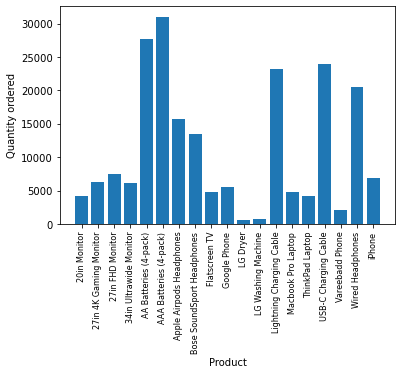

In [26]:
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity ordered')
plt.xlabel('Product')
plt.show()

/tmp/ipykernel_7842/3839979199.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


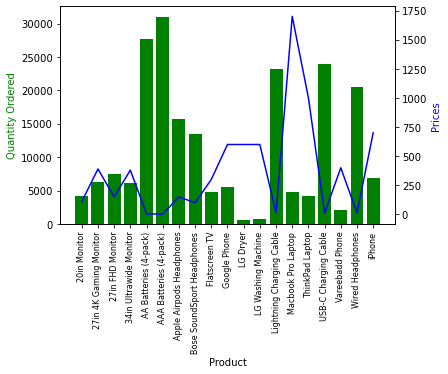

In [39]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)


plt.show()